# Chapter 2
# Numerical programming
_Version: February 14, 2022, see_ [PyEcon.org](https://pyecon.org).

The Numerical Python package (NumPy) provides efficient tools for scientific computing and data analysis:
- np.array(): Multidimensional array capable of doing fast and efficient computations,
- Built-in mathematical functions on arrays without writing loops,
- Built-in linear algebra functions.

## Section 2.1
## NumPy package

### Import NumPy

In [2]:
import numpy as np

### Element-wise addition

In [ ]:
vec1 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
vec2 = np.array(vec1)
vec1 + vec1
vec2 + vec2
for i in range(len(vec1)):
    vec1[i] += vec1[i]
vec1

### Matrix multiplication

In [ ]:
mat1 = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
mat2 = np.array(mat1)
np.dot(mat2, mat2)
mat3 = np.zeros([3, 3])
for i in range(3):
    for k in range(3):
        for j in range(3):
            mat3[i][k] = mat3[i][k] + mat1[i][j] * mat1[j][k]
mat3

### Time comparison

In [ ]:
import time
mat1 = np.random.rand(50, 50)
mat2 = np.array(mat1)
t = time.time()
mat3 = np.dot(mat2, mat2)
nptime = time.time() - t
mat3 = np.zeros([50, 50])
t = time.time()
for i in range(50):
    for k in range(50):
        for j in range(50):
            mat3[i][k] = mat3[i][k] + mat1[i][j] * mat1[j][k]
pytime = time.time() - t
times = str(pytime / nptime)
print("NumPy is " + times + " times faster!")

## Section 2.2
## Array basics

### Creation

In [3]:
arr1 = [4, 8, 2]
arr1 = np.array(arr1)
arr2 = np.array([24.3, 0., 8.9, 4.4, 1.65, 45])
arr3 = np.array([[4, 8, 5], [9, 3, 4], [1, 0, 6]])
arr1.ndim
arr3.shape

(3, 3)

### Creation functions

In [ ]:
np.zeros((4, 3))
np.arange(6)
np.identity(3)

### Array creation

In [ ]:
np.linspace(0, 80, 5)
np.full((5, 4), 7)

### Array of random numbers

In [ ]:
np.random.rand(3, 3)
np.random.randint(10, size=(5, 4))

### Reference

In [4]:
arr3
arr = arr3
arr[1, 1] = 777
arr3
arr3[1, 1] = 3

### Data types

In [5]:
arr1.dtype
arr2.dtype
arr1 = arr1 * 2.5
arr1.dtype
arr1 = (arr1 / 2.5).astype(np.int64)
arr1.dtype

dtype('int64')

### Element-wise operations

In [ ]:
arr3
arr3 + arr3
arr3**2

### Element-wise operations

In [ ]:
arr3 * arr3
arr = np.ones((3, 2))
arr
arr3 * arr  # not defined for element-wise multiplication

### Indexing with an integer

In [ ]:
arr = np.arange(10)
arr
arr[4]
arr[-1]

### Slicing in one dimension

In [ ]:
arr = np.arange(10)
arr
arr[3:7]
arr[1:]

### Slicing in one dimension with steps

In [ ]:
arr[:7]
arr[-3:]
arr[::-1]
arr[::2]

### Indexing rows

In [ ]:
arr3
vec = arr3[1]
vec
arr3[-1]

### Slicing in two dimensions

In [ ]:
arr3
arr3[0:2, 0:2]
arr3[2:, :]

### Create a view by slicing

In [8]:
column = arr3[:, 1]
column
column.base



array([[  4,   8,   5],
       [  9, 100,   4],
       [  1,   0,   6]])

In [9]:
column

array([  8, 100,   0])

In [7]:
column[1] = 100
arr3

array([[  4,   8,   5],
       [  9, 100,   4],
       [  1,   0,   6]])

### Boolean arrays

In [10]:
bool_arr = (arr3 < 5)
bool_arr
bool_arr1 = (arr3 == 0)
bool_arr1

array([[False, False, False],
       [False, False, False],
       [False,  True, False]])

### Boolean arrays and bitwise operators

In [ ]:
a = np.array([3, 8, 4, 1, 9, 5, 2])
b = np.array([2, 3, 5, 6, 11, 15, 17])
c = (a % 2 == 0) | (b % 3 == 0)  # or
c
d = (a > b) ^ (a % 2 == 1)  # exclusive or
d
c ^ d  # exclusive or

### Indexing with boolean arrays

In [ ]:
arr3
y = arr3 % 2 == 0
y
arr3[y]

### Find and replace values in arrays

In [15]:
a, b = arr3.copy(), arr3.copy()
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        if a[i, j] % 2 == 0:
            a[i, j] = 5



In [16]:
a, b = arr3.copy(), arr3.copy()
b

array([[  4,   8,   5],
       [  9, 100,   4],
       [  1,   0,   6]])

In [17]:
b % 2 == 0

array([[ True,  True, False],
       [False,  True,  True],
       [False,  True,  True]])

In [18]:
b[b % 2 == 0]

array([  4,   8, 100,   4,   0,   6])

In [19]:
b[b % 2 == 0] = 5
b


array([[5, 5, 5],
       [9, 5, 5],
       [1, 5, 5]])

In [ ]:
np.allclose(a, b)

### Find and replace values in arrays, condition: equal

In [20]:
arr3
arr = arr3.copy()
arr[arr == 4] = 100
arr

array([[100,   8,   5],
       [  9, 100, 100],
       [  1,   0,   6]])

In [21]:
arr3

array([[  4,   8,   5],
       [  9, 100,   4],
       [  1,   0,   6]])

In [22]:
for item in arr3:
    print(item)

[4 8 5]
[  9 100   4]
[1 0 6]


### Best practice Step 1a

In [ ]:
mat = np.arange(12).reshape((3, 4))
mat
mat[2, 2]
mat[0, -1]

### Best practice Step 1b

In [ ]:
mat = np.arange(12).reshape((3, 4))
mat
mat[2]
mat[0]

### Best practice Step 2a

In [ ]:
mat = np.arange(12).reshape((3, 4))
mat
mat[0:2]
mat[0:2, ::2]

### Best practice Step 2b

In [ ]:
mat
row = mat[1]  # get second row
column = mat[:, 2]  # get third column
row
column

### Best practice Step 3

In [ ]:
mat = np.arange(12).reshape((3, 4))
mat
mat[[1, 2], [1, 2]]
mat[[0, -1], [-1]]

### Best practice Step 4

In [ ]:
bool_mat = mat > 0
bool_mat
mat[bool_mat] = 111  # equivalent to mat[mat > 0] = 111
mat

### Best practice Step 5

In [ ]:
mat[0] = np.array([3, 2, 1])  # Fails because the shapes do not fit
mat[2, 3] = 100
mat[:, 0] = np.array([3, 3, 3])
mat
mat[1:3, 1:3] = np.array([[0, 0], [0, 0]])
mat

### Reshape

In [ ]:
arr = np.arange(15)
arr.reshape((3, 5))

arr = np.arange(15)
arr.resize((3, 7))
arr

### Naming

In [ ]:
a = np.arange(5)
a = np.append(a, 8)
a = np.insert(a, 3, 77)
print(a)
a.resize((3, 3))
np.delete(a, 1, axis=0)

### Naming

In [23]:
a

array([[  4,   8,   5],
       [  9, 100,   4],
       [  1,   0,   6]])

In [25]:
np.arange(6).reshape(2, 3)

array([[0, 1, 2],
       [3, 4, 5]])

In [ ]:
np.concatenate((a, np.arange(6).reshape(2, 3)), axis=0)
np.split(np.arange(8), 4)

### Transpose

In [ ]:
arr3
arr3.T
np.eye(3).T

### Matrix multiplication

In [ ]:
res = np.dot(arr3, np.arange(18).reshape((3, 6)))
res
res2 = arr3 @ np.arange(18).reshape((3, 6))
res2
np.allclose(res, res2)

### Element-wise functions

In [ ]:
arr3
np.sqrt(arr3)
np.exp(arr3)

### Binary

In [ ]:
x = np.array([3, -6, 8, 4, 3, 5])
y = np.array([3, 5, 7, 3, 5, 9])
np.maximum(x, y)
np.greater_equal(x, y)
np.add(x, y)
np.mod(x, y)

### Evaluate the function $f(x,y)=\sqrt{x^{2}+y^{2}}$ on a 10 x 10 grid

In [26]:
p = np.arange(-5, 5, 1)
x, y = np.meshgrid(p, p)
x

array([[-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4]])

### Evaluate the function $f(x,y)=\sqrt{x^{2}+y^{2}}$ on a 10 x 10 grid.

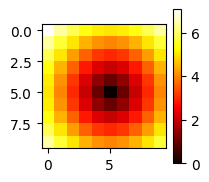

In [27]:
import matplotlib.pyplot as plt
val = np.sqrt(x**2 + y**2)
plt.figure(figsize=(2, 2))
plt.imshow(val, cmap="hot")
plt.colorbar()

### Conditional logic

In [ ]:
a = np.array([4, 7, 5, -7, 9, 0])
b = np.array([-1, 9, 8, 3, 3, 3])
cond = np.array([True, True, False, True, False, False])
res = np.where(cond, a, b)
res
res = np.where(a <= b, b, a)
res

### Conditional logic, examples

In [ ]:
arr3
res = np.where(arr3 < 5, 0, arr3)
res
even = np.where(arr3 % 2 == 0, arr3, arr3 + 1)
even

### Statistical methods

In [ ]:
arr3
arr3.mean()
arr3.sum()
arr3.argmin()

### Axis

In [ ]:
arr3
arr3.sum(axis=0)
arr3.sum(axis=1)

### Sorting one-dimensional arrays

In [ ]:
arr2
arr2.sort()
arr2

### Sorting two-dimensional arrays

In [ ]:
arr3
arr3.sort()
arr3
arr3.sort(axis=0)
arr3

## Section 2.3
## Linear algebra

### Import numpy.linalg

In [ ]:
import numpy.linalg as nplin

### Inverse

In [ ]:
inv = nplin.inv(arr3)
inv
np.allclose(np.identity(3), np.dot(inv, arr3))

### Linear algebra functions

In [ ]:
nplin.det(arr3)
np.trace(arr3)
np.diag(arr3)

### Get eigenvalues and eigenvectors

In [ ]:
A = np.array([[3, -1, 0], [2, 0, 0], [-2, 2, -1]])
eigenval, eigenvec = nplin.eig(A)
eigenval
eigenvec

### Check eigenvalues and eigenvectors

In [ ]:
eigenval * eigenvec
np.dot(A, eigenvec)

### QR decomposition

In [ ]:
Q, R = nplin.qr(arr3)
Q
R
np.allclose(arr3, np.dot(Q, R))

### Solve linearsystems

In [ ]:
b = np.array([7, 4, 8])
x = nplin.solve(A, b)
x
np.allclose(np.dot(A, x), b)